# Data Load


In [32]:
import numpy as np
import pandas as pd

In [51]:
path = "./Dataset/"

data = pd.read_csv(path+"kwproja_data.csv")

# original data -> data
data

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,201703,95662180105,닥터빈스,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,201703,1140530114,전주식당,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,201703,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,201702,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,201702,88958530107,아디다스퍼포먼스타임스퀘어,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153390,201801,45688770211,(주)스위틀,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
153391,201712,65130960211,젤 에스테틱,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
153392,201712,708600354,카카오아이엑스 주식회사,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
153393,201712,51363910128,월드타워약국,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


# EDA 

153395 rows X 31 columns

- 매장 속성 정보
  - shop_code -> 식별자 feature, input feature로는 사용하지 않지만 분류를 위해서는 사용할 수 있을 것 같음  
  - shop_name -> input feature로는 사용하지 않음 (NLP deep learning 가능성 있음)
  - longtitude : 경도, latitude : 위도 -> 매장 위치 (회사 근처, 학교 근처 등 매출 영향성 있음) -> 군집화, labeling 필요
  - shop_type_big -> 13 category  -> 업종 (매출 영향성 있음)
  - shop_type_small -> 367 category

- 매출 정보
  - date -> 12 category, 201702~ 201801 까지의 data
  - monthly_gain / avearge_sale_price = 한달 총 판매수

- 매출 통계 정보
  - weekday0~6 : 일 ~ 월
  - time -> 05_10 / 10_14 / 14_18 / 18_20 / 20_22 / 22_24 / 24_05 => 시간대가 동일하지 않음
    - 새벽대는 찾는 손님 적어 시간 길게 잡았을 것
    - 저녁 시간대는 가장 매출이 많이 이뤄지는 prime time 이라 시간대를 짧게 잡았을 것
  - female/male : 20/30/40/50 -> 8 columns

##### monthly_gain과 average_sale_price 중 어느 것을 y값으로 둘 것인가? 
- 월매출 예측 문제로 가정하고 montly_gain 을 y값으로 예측하는 모델 만들기

##### shop_code는 input feature에 넣어야 하는가?
- 특별한 브랜드가 y값을 결정하는 과적합 요소가 될 수 있으므로
- X 에서 shop code, shop name 제외하는 것도 방법
- 어느 위치에 어떤 업종으로 어떤 객단가인 매장을 오픈하면 월매출이 어떻게 될까? 문제
 - X: shop type big, shop type small, longitude, latitude, avg_sale_price, 
 - y: montly_gain

In [34]:
data.columns

Index(['date', 'shop_code', 'shop_name', 'shop_type_big', 'shop_type_small',
       'longitude', 'latitude', 'monthly_gain', 'average_sale_price',
       'female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50', 'weekday0', 'weekday1', 'weekday2',
       'weekday3', 'weekday4', 'weekday5', 'weekday6', 'time_05_10',
       'time_10_14', 'time_14_18', 'time_18_20', 'time_20_22', 'time_22_24',
       'time_00_05'],
      dtype='object')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153395 entries, 0 to 153394
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                153395 non-null  int64  
 1   shop_code           153395 non-null  int64  
 2   shop_name           153395 non-null  object 
 3   shop_type_big       148927 non-null  object 
 4   shop_type_small     148927 non-null  object 
 5   longitude           153395 non-null  float64
 6   latitude            153395 non-null  float64
 7   monthly_gain        153395 non-null  float64
 8   average_sale_price  153395 non-null  int64  
 9   female_20           153395 non-null  float64
 10  female_30           153395 non-null  float64
 11  female_40           153395 non-null  float64
 12  female_50           153395 non-null  float64
 13  male_20             153395 non-null  float64
 14  male_30             153395 non-null  float64
 15  male_40             153395 non-nul

# Preprocessing
- missing value 제거 : 3,605제거 -> 총 149,789 data
- shop_code, shop_name : 식별자 feature 이므로 drop 
- shop_type_big(13), shop_type_small(367) : label encodding
- longitude, latitude : labeling 
- MinMaxSaclar 정규화 -> 정규화 column의 범위는??
- date : 아직은 쓸 수 없으므로 drop


In [45]:
# 원본 data와 따로 관리 -> original data = data, input data = input_data 
# feature drop
input_data = data.copy()

input_data = input_data.drop(['date', 'shop_code', 'shop_name'], axis=1)
#input_data

In [46]:
# missing value drop - monthly_gain
drop_index = input_data[input_data['monthly_gain']==0].index 
#print(len(drop_index)) -> 3605

input_data = input_data.drop(drop_index)
#input_data

In [47]:
# missing value drop - shop_type_big
null_index = input_data[input_data['shop_type_big'].isnull()==True].index
input_data = input_data.drop(null_index)
input_data

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,5.43,18.68,4.63,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,12.12,9.68,8.15,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,9.64,4.05,3.57,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,11.48,6.31,4.77,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,10.48,16.90,9.56,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153390,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,0.00,25.35,22.82,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
153391,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,0.00,46.48,44.72,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
153392,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,14.62,9.13,2.91,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
153393,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,18.09,9.60,9.93,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


In [48]:
# There is no "null" in "shop_type_small" feature 
# So we get inpute_data = 145,487 X 28

#print(df_check['shop_type_small'].unique())
print(len(input_data['shop_type_small'].unique()))
print(input_data['shop_type_small'].isnull().value_counts())

367
False    145487
Name: shop_type_small, dtype: int64


In [49]:
# issue -> shop_type_big에 관한 2번째 issue를 참고하세요!
# issue -> '음식'과 '음식 ' 두 개로 count 되고 있습니다. 아래 코드로 수정하시길 바랍니다

input_data.loc[data['shop_type_big'] == '음식 ', 'shop_type_big'] = '음식'
print(input_data['shop_type_big'].nunique())
print(input_data['shop_type_big'].unique())

13
['음식' '소매' '의료' '숙박' '관광/여가/오락' '학문/교육' '생활서비스' '스포츠' '도매/유통/무역' '제조'
 '부동산' '전자/정보통신' '기술서비스']


In [56]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

input_data['shop_type_big'] = le.fit_transform(list(input_data['shop_type_big']))   # fit transform으로 한번에 처리 가능
le.classes_

array(['관광/여가/오락', '기술서비스', '도매/유통/무역', '부동산', '생활서비스', '소매', '숙박', '스포츠',
       '음식', '의료', '전자/정보통신', '제조', '학문/교육'], dtype='<U8')

In [57]:
le = LabelEncoder()

input_data['shop_type_small'] = le.fit_transform(list(input_data['shop_type_small'])) 
le.classes_

array(['가구 제조', '가구 판매-중고', '가발 판매', '가방 제조', '가방/구두 수선', '가전기기/용품 설비',
       '가전제품 도매', '가전제품 소매', '가정용품 수리', '가죽/모피제품 판매', '건강/헬스용품 판매/수리',
       '건강식품 판매', '건축물시설관리', '건축용자제/용품 판매', '결혼상담소', '경양식 전문점', '고기 부페',
       '고기구이 전문점', '고속도로 휴게소', '고시원', '골동품/예술품 수집', '골동품/예술품 판매', '골프연습장',
       '골프용품 판매', '곱창/양구이 전문점', '공예품 판매', '과학기기 도매', '관광유흥주점', '광고기획',
       '광고물/간판 제작', '광고재료 도매', '교복 판매', '구내식당/자급식음식점', '구판장/직판장',
       '국수/수제비 전문점', '귀금속/장신구 제조', '귀금속/장신구 판매', '그릇 판매', '그림/액자 판매',
       '기술서비스-기타', '기타세계요리 전문점', '기타일반 유흥주점', '기호식품도매', '꽃집/꽃배달', '나이트클럽',
       '낙지/문어/오징어/쭈꾸미 전문점', '냉동냉장/냉난방기기 제조', '냉동냉장/냉난방기기 판매', '냉면 전문점',
       '네일케어', '노래방', '농산물 판매', '농축산물 판매', '당구장', '도너츠 전문점', '도료/페인트 판매',
       '도시락 전문점', '독서실', '돈가스 전문점', '등산용품 판매', '떡/한과 전문점', '렌터카',
       '룸살롱/단란주점', '마라/양꼬치 전문점', '멀티방', '면 전문점', '면세백화점', '모조신변잡화 도매',
       '모텔', '모형/교구 제조', '목욕탕', '무도유흥주점-종합', '무억업', '무역업-기타', '무예/투기 도장',
       '무용복 판매', '문구용품 도매', '문구용품 소매', '문구용품 판매', '문화센터', '물품보관소', '미곡

In [58]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145487 entries, 0 to 153394
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shop_type_big       145487 non-null  int64  
 1   shop_type_small     145487 non-null  int64  
 2   longitude           145487 non-null  float64
 3   latitude            145487 non-null  float64
 4   monthly_gain        145487 non-null  float64
 5   average_sale_price  145487 non-null  int64  
 6   female_20           145487 non-null  float64
 7   female_30           145487 non-null  float64
 8   female_40           145487 non-null  float64
 9   female_50           145487 non-null  float64
 10  male_20             145487 non-null  float64
 11  male_30             145487 non-null  float64
 12  male_40             145487 non-null  float64
 13  male_50             145487 non-null  float64
 14  weekday0            145487 non-null  float64
 15  weekday1            145487 non-nul

In [19]:
# Normalization
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

#scale_cols = input_data.columns.tolist()
#scaled_data = scaler.fit_transform(input_data[scale_cols])
#scaled_data = pd.DataFrame(scaled_data)
#scaled_data.columns = scale_cols 

#input_data = scaled_data
#input_data

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,0.571429,0.839237,0.128587,0.843021,0.000051,0.000121,0.0958,0.0543,0.1868,0.046295,...,0.1715,0.1192,0.0634,0.0115,0.7278,0.2314,0.0293,0.0000,0.0000,0.0000
1,0.571429,0.953678,0.598197,0.143170,0.000077,0.000176,0.0508,0.1212,0.0968,0.081492,...,0.1938,0.1635,0.1082,0.0083,0.7682,0.1325,0.0909,0.0000,0.0000,0.0000
2,0.571429,0.046322,0.610510,0.127312,0.000936,0.000881,0.1051,0.0964,0.0405,0.035696,...,0.2118,0.2159,0.1804,0.0464,0.0850,0.0240,0.1867,0.5005,0.0984,0.0589
3,0.571429,0.046322,0.610510,0.127312,0.000874,0.000853,0.1210,0.1148,0.0631,0.047695,...,0.2608,0.2260,0.1551,0.0268,0.0809,0.0577,0.1015,0.5461,0.1625,0.0245
4,0.357143,0.471390,0.006469,0.282728,0.001143,0.001116,0.1504,0.1048,0.1690,0.095590,...,0.1644,0.1038,0.2271,0.0043,0.2638,0.3920,0.2530,0.0869,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149785,0.928571,0.891008,0.685052,0.392348,0.000206,0.013529,0.0000,0.0000,0.2535,0.228177,...,0.2648,0.0000,0.0000,0.7352,0.2648,0.0000,0.0000,0.0000,0.0000,0.0000
149786,0.357143,0.983651,0.717663,0.383997,0.000014,0.000407,0.0000,0.0000,0.4648,0.447155,...,0.0530,0.2318,0.2053,0.2318,0.5265,0.1358,0.1060,0.0000,0.0000,0.0000
149787,0.357143,0.711172,0.788293,0.175261,0.002829,0.000480,0.3127,0.1462,0.0913,0.029097,...,0.1302,0.1371,0.1384,0.0660,0.4494,0.3645,0.1201,0.0000,0.0000,0.0000
149788,0.714286,0.525886,1.000000,0.228566,0.000716,0.000120,0.2315,0.1809,0.0960,0.099290,...,0.1042,0.1171,0.1684,0.0445,0.2570,0.3000,0.2270,0.1661,0.0055,0.0000


In [59]:
ax = plt.subplots()
ax = sns.distplot(input_data['monthly_gain'], hist=False)
ax.set_title('Total Gain Density')
ax.set_xlabel('Monthly Gain')
ax.set_ylabel('Unit Probability')
print(input_data['monthly_gain'].value_counts())

NameError: name 'plt' is not defined

# Data Split

In [60]:
input_data_y = input_data['monthly_gain'].copy()
input_data_X = input_data.drop(['monthly_gain'], axis=1)

In [61]:
from sklearn.model_selection import train_test_split

tr_val_X, test_X, tr_val_y, test_y = train_test_split(
    input_data_X, 
    input_data_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42)      
print(len(test_X))

train_X, valid_X, train_y, valid_y = train_test_split(
    tr_val_X, 
    tr_val_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42) 

print(len(train_X))
print(len(valid_X))
print(29958 + 95865 + 23967 )

29098
93111
23278
149790


# Modeling
- XGB
- LGBM

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit,GridSearchCV
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from lightgbm import plot_importance 
from xgboost import XGBRegressor
from xgboost import plot_importance

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [64]:
model_xgb = XGBRegressor()

model_xgb.fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(valid_X, valid_y)],verbose=True)
pred_xgb = model_xgb.predict(test_X)

[0]	validation_0-rmse:894143040.00000
[1]	validation_0-rmse:713519936.00000
[2]	validation_0-rmse:616427968.00000
[3]	validation_0-rmse:551997376.00000
[4]	validation_0-rmse:502604640.00000
[5]	validation_0-rmse:487618240.00000
[6]	validation_0-rmse:481640256.00000
[7]	validation_0-rmse:464070528.00000
[8]	validation_0-rmse:446065792.00000
[9]	validation_0-rmse:445370528.00000
[10]	validation_0-rmse:405435456.00000
[11]	validation_0-rmse:401051968.00000
[12]	validation_0-rmse:388100448.00000
[13]	validation_0-rmse:384782464.00000
[14]	validation_0-rmse:378169184.00000
[15]	validation_0-rmse:363773728.00000
[16]	validation_0-rmse:363438656.00000
[17]	validation_0-rmse:346986336.00000
[18]	validation_0-rmse:339689088.00000
[19]	validation_0-rmse:330104832.00000
[20]	validation_0-rmse:320861728.00000
[21]	validation_0-rmse:318028544.00000
[22]	validation_0-rmse:317854144.00000
[23]	validation_0-rmse:317958016.00000
[24]	validation_0-rmse:314466016.00000
[25]	validation_0-rmse:313541024.00

In [65]:
model_lgbm = LGBMRegressor()

model_lgbm.fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(valid_X, valid_y)], verbose=True)
pred_lgbm = model_lgbm.predict(test_X)

[1]	valid_0's l2: 1.07123e+18
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 9.74973e+17
[3]	valid_0's l2: 9.12725e+17
[4]	valid_0's l2: 8.44551e+17
[5]	valid_0's l2: 7.40268e+17
[6]	valid_0's l2: 6.66465e+17
[7]	valid_0's l2: 6.42793e+17
[8]	valid_0's l2: 5.75879e+17
[9]	valid_0's l2: 5.32866e+17
[10]	valid_0's l2: 5.10774e+17
[11]	valid_0's l2: 4.94211e+17
[12]	valid_0's l2: 4.56178e+17
[13]	valid_0's l2: 4.29551e+17
[14]	valid_0's l2: 4.07512e+17
[15]	valid_0's l2: 3.94783e+17
[16]	valid_0's l2: 3.72546e+17
[17]	valid_0's l2: 3.55696e+17
[18]	valid_0's l2: 3.35666e+17
[19]	valid_0's l2: 3.24641e+17
[20]	valid_0's l2: 3.1543e+17
[21]	valid_0's l2: 3.04418e+17
[22]	valid_0's l2: 2.95275e+17
[23]	valid_0's l2: 2.8898e+17
[24]	valid_0's l2: 2.85655e+17
[25]	valid_0's l2: 2.7656e+17
[26]	valid_0's l2: 2.69496e+17
[27]	valid_0's l2: 2.63327e+17
[28]	valid_0's l2: 2.55695e+17
[29]	valid_0's l2: 2.50636e+17
[30]	valid_0's l2: 2.44657e+17
[31]	valid_0's l2: 2

## Prediction

In [66]:
def plot_history(history):
    #hist = pd.DataFrame(history.history)
    #history['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    
    # Mean Abs Error : 평균 절대 오차, 측정값에서 오차의 크기로 측정값과 실제값과의 차이, 절대 오차의 평균  
    # -> 측정하고자 하는 값을 정확하게 측정하지 못함으로써 발생
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()
    
    # Mean Square Error : 평균 제곱 오차, 오차의 제복에 대한 평균을 취한 값
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    plt.show()
    
def show_pred(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    
    df_result = pd.DataFrame(list(zip(true_y, pred)), columns=['true_y', 'prediction'])
    return df_result

def show_mse_rmse(test_y, pred) :
    mse = mean_squared_error(test_y, pred)
    print("mse : %f" % mse)
    
    rmse = np.sqrt(mse)
    print("rmse: %f \n" %rmse)
    
def show_prediction_error(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    error = pred - true_y
    plt.hist(error, bins=25)
    plt.xlabel("Prediction Error")
    _ = plt.ylabel("Count")
    
def feature_importance(model_xgb) : 
    %matplotlib inline
    plt.rcParams['axes.unicode_minus'] = False
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = fm.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(model_xgb, ax=ax)
    
def graph(pred, test_label) :
    plt.figure(figsize=(16, 9))
    plt.plot(test_label, label = 'actual')
    plt.plot(pred, label = 'prediction')
    plt.legend()
    plt.show()

In [67]:
show_pred(test_y, pred_xgb)

,true_y,prediction
0,4.469921e+07,71230928.0
1,7.752010e+07,45622224.0
2,2.643516e+07,55446424.0
3,6.464000e+06,-7818038.0
4,3.267496e+07,118366576.0
...,...,...
29093,7.123342e+07,52485932.0
29094,1.187760e+07,10642825.0
29095,1.468597e+08,50024580.0
29096,2.041190e+07,57971980.0


In [68]:
show_pred(test_y, pred_lgbm)

,true_y,prediction
0,4.469921e+07,1.594089e+07
1,7.752010e+07,2.366601e+07
2,2.643516e+07,3.294297e+07
3,6.464000e+06,-2.195502e+06
4,3.267496e+07,5.379035e+07
...,...,...
29093,7.123342e+07,3.733732e+07
29094,1.187760e+07,2.738797e+07
29095,1.468597e+08,5.468621e+07
29096,2.041190e+07,-1.734903e+07


In [27]:
show_prediction_error(test_y, pred_xgb)

NameError: name 'plt' is not defined

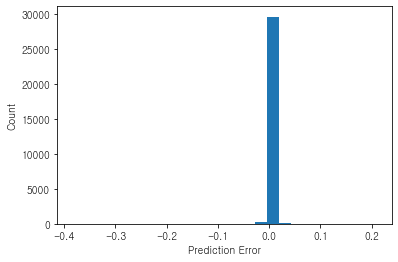

In [32]:
show_prediction_error(test_y, pred_lgbm)

In [69]:
show_mse_rmse(test_y, pred_xgb)

mse : 106323900498747808.000000
rmse: 326073458.746258 



In [70]:
show_mse_rmse(test_y, pred_lgbm)

mse : 117508402373904720.000000
rmse: 342794985.922934 



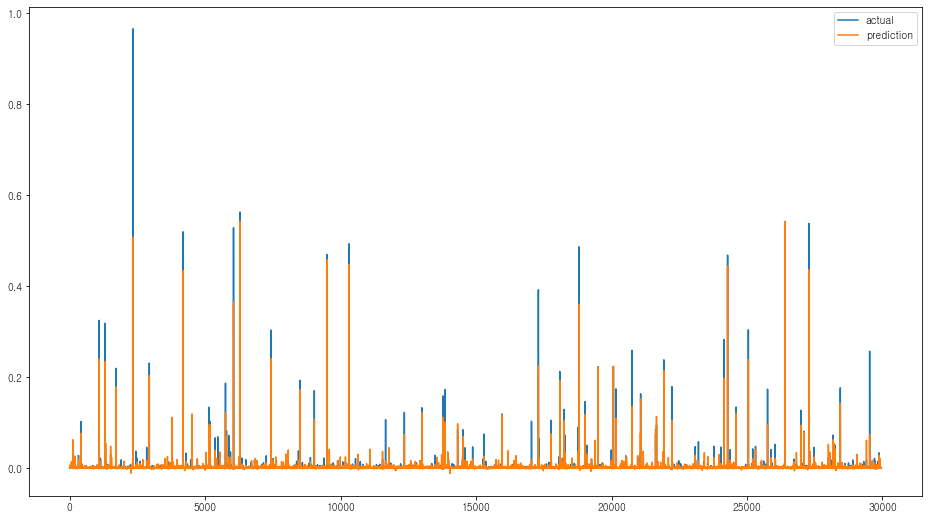

In [35]:
true_y = test_y.to_numpy()
graph(pred_xgb, true_y)

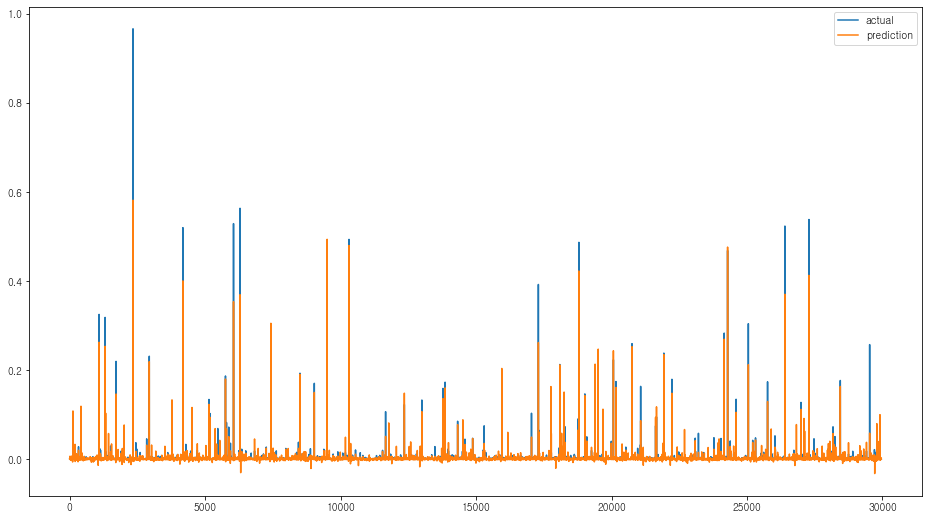

In [36]:
true_y = test_y.to_numpy()
graph(pred_lgbm, true_y)

<AxesSubplot:>

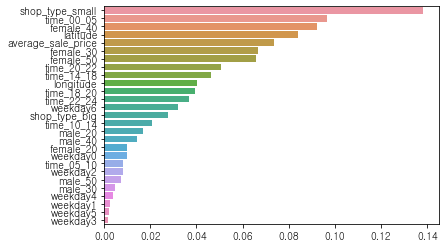

In [37]:
feature_series = pd.Series(data=model_xgb.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)

<AxesSubplot:>

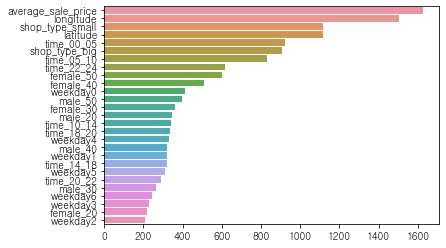

In [38]:
feature_series = pd.Series(data=model_lgbm.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)